In [2]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, 
    cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

In [4]:
X.shape, y.shape

((1000, 2), (1000, 1))

In [5]:
X

array([[-3.75777913,  4.5291416 ],
       [-7.91575179, -3.61404891],
       [ 2.88672576,  5.64336681],
       ...,
       [-2.04803419,  4.69042967],
       [-1.86422702,  4.22790859],
       [-9.86565836, -5.06598889]])

In [6]:
y[0:5]

array([[0],
       [1],
       [0],
       [1],
       [1]])

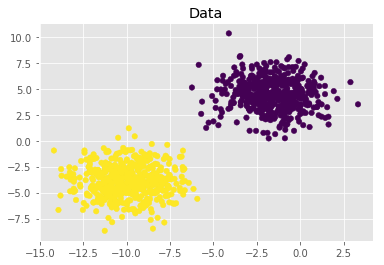

In [7]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)


In [8]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import sklearn.linear_model as sk
clf = sk.Perceptron()
clf.fit(trainX, trainY)

print('Training set Accuracy:', clf.score(trainX, trainY))
print('Testing set Accuracy:', clf.score(testX, testY))

Training set Accuracy: 1.0
Testing set Accuracy: 1.0


D:\ProgramFiles\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\ProgramFiles\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


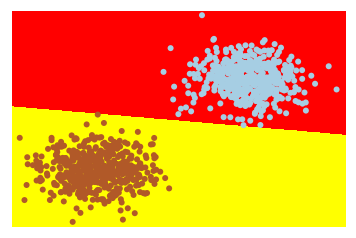

In [31]:
# Example based on:
# Code source: Gaël Varoquaux, Modified for documentation by Jaques Grobler, License: BSD 3 clause

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()